# 1. Importação de Bibliotecas e Leitura dos Dados

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import time
from tqdm import tqdm

sns.set_theme(style="darkgrid", palette="viridis")
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [66]:
path_mensalidades = '..\\data\\mensalidades_teste.csv'
path_cobranca = '..\\data\\cobrancas_teste.csv'

df_mensalidades = pd.read_csv(path_mensalidades)
df_cobranca = pd.read_csv(path_cobranca)

In [67]:
print("Mensalidades:")
display(df_mensalidades.head())

Mensalidades:


,id_aluno,id_ies,id_curso,data_competencia,data_vencimento,valor_cobrado,data_baixa
0,189502792563495,25230144647375869829,130762,2025-02-01,2025-02-28,1040.50,NaN
1,644824673289627,25230144647375869829,754747,2024-03-01,2024-03-30,563.88,2024-03-05
2,644824673289627,25230144647375869829,754747,2024-04-01,2024-04-30,563.88,2024-04-05
3,644824673289627,25230144647375869829,754747,2024-05-01,2024-05-30,563.88,2024-05-07
4,644824673289627,25230144647375869829,754747,2024-06-01,2024-06-30,563.88,2024-06-03


In [68]:
print("Ações de Cobrança:")
display(df_cobranca.head())

Ações de Cobrança:


,id,acao_cobranca,id_aluno,data_cobranca
0,27,e-mail,696609114597551,2024-05-23
1,28,whatsapp,696609114597551,2024-05-25
2,29,SMS,696609114597551,2024-05-28
3,30,e-mail,696609114597551,2024-05-30
4,31,SMS,696609114597551,2024-05-30


# 2. Análise Exploratória e Tratamento de Dados

## 2.1 Mensalidades

In [69]:
# Conversão de colunas de datas
date_columns = ['data_competencia','data_vencimento', 'data_baixa']
for col in date_columns:
    df_mensalidades[col] = pd.to_datetime(df_mensalidades[col], errors='coerce')
display(df_mensalidades.head())

,id_aluno,id_ies,id_curso,data_competencia,data_vencimento,valor_cobrado,data_baixa
0,189502792563495,25230144647375869829,130762,2025-02-01,2025-02-28,1040.50,NaT
1,644824673289627,25230144647375869829,754747,2024-03-01,2024-03-30,563.88,2024-03-05
2,644824673289627,25230144647375869829,754747,2024-04-01,2024-04-30,563.88,2024-04-05
3,644824673289627,25230144647375869829,754747,2024-05-01,2024-05-30,563.88,2024-05-07
4,644824673289627,25230144647375869829,754747,2024-06-01,2024-06-30,563.88,2024-06-03


In [70]:
print("Info - Mensalidades:")
print(df_mensalidades.info())

Info - Mensalidades:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_aluno          200000 non-null  int64         
 1   id_ies            200000 non-null  object        
 2   id_curso          200000 non-null  int64         
 3   data_competencia  200000 non-null  datetime64[ns]
 4   data_vencimento   200000 non-null  datetime64[ns]
 5   valor_cobrado     200000 non-null  float64       
 6   data_baixa        155383 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(1)
memory usage: 10.7+ MB
None


In [71]:
print("Estatísticas Descritivas - Mensalidades:")
display(df_mensalidades['valor_cobrado'].describe())

Estatísticas Descritivas - Mensalidades:


count    200000.000000
mean        444.957160
std         405.536112
min           6.040000
25%         159.770000
50%         289.180000
75%         591.420000
max       11500.000000
Name: valor_cobrado, dtype: float64

In [72]:
num_duplicados = df_mensalidades.duplicated().sum()
print(f"\nNúmero de registros duplicados em df_mensalidades: {num_duplicados}")


Número de registros duplicados em df_mensalidades: 0


In [73]:
print("Valores Ausentes - Mensalidades:")
print(df_mensalidades.isnull().sum())

Valores Ausentes - Mensalidades:
id_aluno                0
id_ies                  0
id_curso                0
data_competencia        0
data_vencimento         0
valor_cobrado           0
data_baixa          44617
dtype: int64


## 2.2 Ações de Cobrança

In [74]:
df_cobranca['data_cobranca'] = pd.to_datetime(df_cobranca['data_cobranca'], errors='coerce')
display(df_cobranca.head())

,id,acao_cobranca,id_aluno,data_cobranca
0,27,e-mail,696609114597551,2024-05-23
1,28,whatsapp,696609114597551,2024-05-25
2,29,SMS,696609114597551,2024-05-28
3,30,e-mail,696609114597551,2024-05-30
4,31,SMS,696609114597551,2024-05-30


In [75]:
print("Info - Ações de Cobrança:")
print(df_cobranca.info())

Info - Ações de Cobrança:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136489 entries, 0 to 1136488
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1136489 non-null  int64         
 1   acao_cobranca  1136489 non-null  object        
 2   id_aluno       1136489 non-null  int64         
 3   data_cobranca  1136489 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.7+ MB
None


In [76]:
# print("Estatísticas Descritivas - Cobranças:")
# display(df_cobranca.describe())

In [77]:
num_duplicados_cobranca = df_cobranca.duplicated().sum()
print(f"\nNúmero de registros duplicados em df_cobranca: {num_duplicados_cobranca}")


Número de registros duplicados em df_cobranca: 0


In [78]:
print("Valores Ausentes - Ações de Cobrança:")
print(df_cobranca.isnull().sum())

Valores Ausentes - Ações de Cobrança:
id               0
acao_cobranca    0
id_aluno         0
data_cobranca    0
dtype: int64


## 2.3 Mapa de calor de missing values

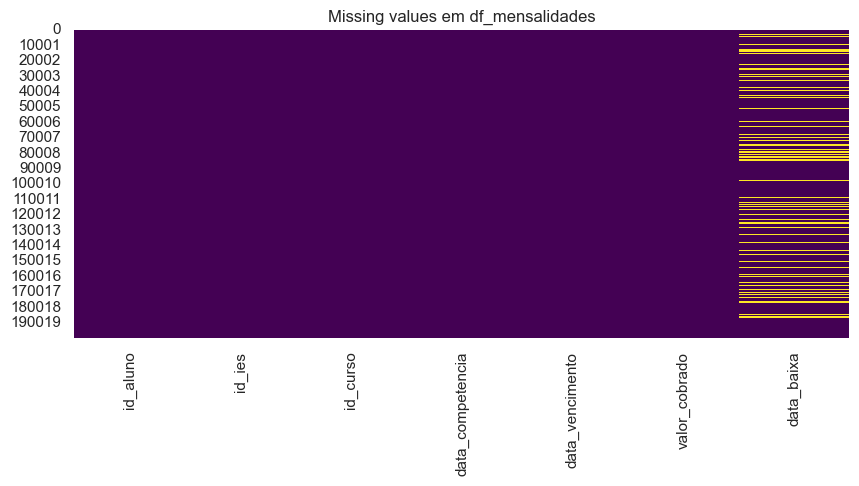

In [79]:
plt.figure(figsize=(10,4))
sns.heatmap(df_mensalidades.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values em df_mensalidades')
plt.show()

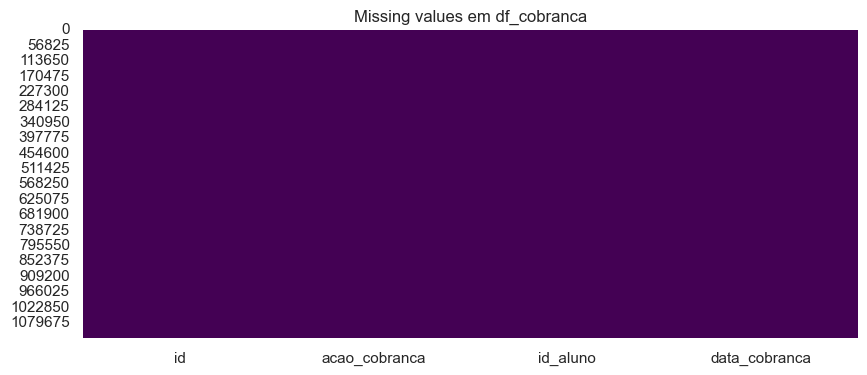

In [80]:
plt.figure(figsize=(10,4))
sns.heatmap(df_cobranca.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values em df_cobranca')
plt.show()

## 3 Criação das novas colunas

In [81]:
# Criar coluna 'status_pagamento'
def classify_payment_status(row):
    if pd.notnull(row['data_baixa']):
        return 'pago'
    elif row['data_vencimento'] < pd.Timestamp.today():
        return 'inadimplente'
    else:
        return 'atrasado'

df_mensalidades['status_pagamento'] = df_mensalidades.apply(classify_payment_status, axis=1)

# Merge dos datasets para associar ações de cobrança com status de pagamento
df_merged = df_cobranca.merge(df_mensalidades, on='id_aluno', how='left')

# Criar coluna indicando se a cobrança resultou em pagamento
df_merged['pagou_apos_cobranca'] = df_merged['data_baixa'].notnull().astype(int)

# Criar novas features
df_merged['dias_atraso'] = (pd.Timestamp.today() - df_merged['data_vencimento']).dt.days

df_merged['num_cobrancas'] = df_merged.groupby('id_aluno')['acao_cobranca'].transform('count')

In [82]:
df_merged

,id,acao_cobranca,id_aluno,data_cobranca,id_ies,id_curso,data_competencia,data_vencimento,valor_cobrado,data_baixa,status_pagamento,pagou_apos_cobranca,dias_atraso,num_cobrancas
0,27,e-mail,696609114597551,2024-05-23,25230144647375869829,251332,2024-04-01,2024-04-30,1259.38,2024-04-08,pago,1,303,306
1,27,e-mail,696609114597551,2024-05-23,25230144647375869829,383434,2024-05-01,2024-05-30,1259.38,2024-06-21,pago,1,273,306
2,27,e-mail,696609114597551,2024-05-23,25230144647375869829,383434,2024-06-01,2024-06-30,1259.38,2024-07-05,pago,1,242,306
3,27,e-mail,696609114597551,2024-05-23,25230144647375869829,383434,2024-08-01,2024-08-30,1259.38,2024-08-14,pago,1,181,306
4,27,e-mail,696609114597551,2024-05-23,25230144647375869829,383434,2024-09-01,2024-09-30,1259.38,2024-09-26,pago,1,150,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272454,1306595,SMS,873863957249792,2024-02-09,59545441076813107334,341447,2024-02-01,2024-02-12,3469.40,2024-02-14,pago,1,381,7
6272455,1306596,e-mail,873863957249792,2024-02-11,59545441076813107334,341447,2024-02-01,2024-02-12,3469.40,2024-02-14,pago,1,381,7
6272456,1306597,SMS,873863957249792,2024-02-11,59545441076813107334,341447,2024-02-01,2024-02-12,3469.40,2024-02-14,pago,1,381,7
6272457,1306598,whatsapp,873863957249792,2024-02-11,59545441076813107334,341447,2024-02-01,2024-02-12,3469.40,2024-02-14,pago,1,381,7


In [83]:
num_duplicados_merged = df_merged.duplicated().sum()
print(f"\nNúmero de registros duplicados: {num_duplicados_merged}")


Número de registros duplicados: 0


In [84]:
print(df_merged.isnull().sum())

id                           0
acao_cobranca                0
id_aluno                     0
data_cobranca                0
id_ies                       0
id_curso                     0
data_competencia             0
data_vencimento              0
valor_cobrado                0
data_baixa             1895131
status_pagamento             0
pagou_apos_cobranca          0
dias_atraso                  0
num_cobrancas                0
dtype: int64


# 4. Treinamento modelo Random Forest

In [85]:
# Seleção de features para o modelo
features = ['acao_cobranca', 'valor_cobrado', 'dias_atraso', 'num_cobrancas']
df_model = df_merged[features + ['pagou_apos_cobranca']]

# Codificação da variável categórica com LabelEncoder
le = LabelEncoder()
df_model['acao_cobranca'] = le.fit_transform(df_model['acao_cobranca'])

# Divisão entre treino e teste
X = df_model.drop(columns=['pagou_apos_cobranca'])
y = df_model['pagou_apos_cobranca']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Treinamento
start_time = time.time()
model = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced', random_state=42, n_jobs=-1)
for _ in tqdm(range(1), desc="Treinando modelo"):
    model.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de treinamento: {end_time - start_time:.2f} segundos")

# Avaliação do modelo
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Treinando modelo: 100%|██████████| 1/1 [03:23<00:00, 203.44s/it]


Tempo de treinamento: 203.45 segundos


In [86]:
print("\nResultados do Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Resultados do Random Forest:
Accuracy: 0.8840
ROC AUC: 0.9516
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82    379026
           1       0.93      0.90      0.92    875466

    accuracy                           0.88   1254492
   macro avg       0.86      0.87      0.87   1254492
weighted avg       0.89      0.88      0.89   1254492



## 5. Gráficos do modelo

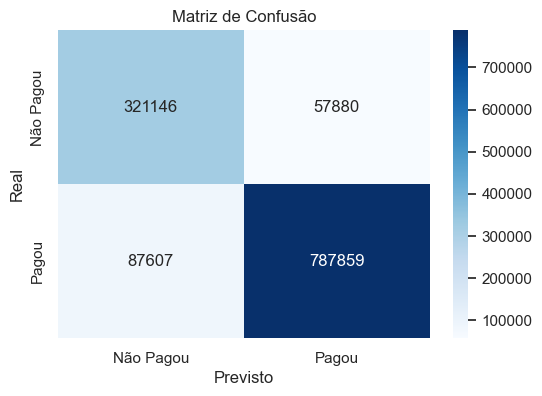

In [87]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Pagou", "Pagou"], yticklabels=["Não Pagou", "Pagou"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## 📊 Matriz de Confusão
A matriz de confusão mostra os acertos e erros do modelo ao classificar os alunos em **pagadores** e **inadimplentes**.

| Classe Real | Previsto: Não Pagou | Previsto: Pagou |
|------------|-----------------|-----------------|
| **Não Pagou (Real 0)** | 321.146 (✅ Correto) | 57.880 (❌ Erro - Falso Positivo) |
| **Pagou (Real 1)** | 87.607 (❌ Erro - Falso Negativo) | 787.859 (✅ Correto) |


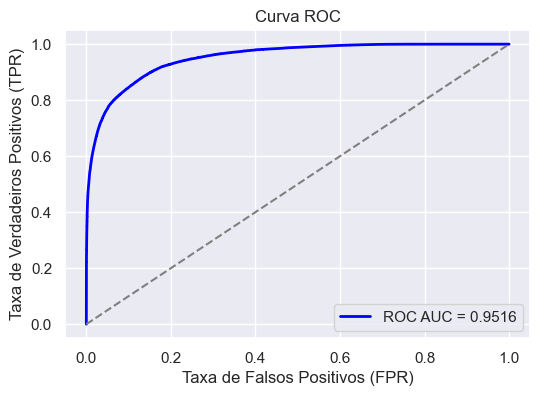

In [88]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

## 📈 Curva ROC
A **Curva ROC (Receiver Operating Characteristic)** avalia a capacidade do modelo de separar corretamente as classes **pagador (1)** e **inadimplente (0)**.

- A curva **mais próxima do canto superior esquerdo** indica um modelo **melhor**.
- O **ROC AUC = 0.9516** indica um **ótimo desempenho**, pois valores próximos de 1 significam que o modelo diferencia bem entre pagadores e inadimplentes.
- A **linha cinza pontilhada** representa um modelo aleatório (**50% de acerto**), então quanto mais acima dessa linha, melhor.

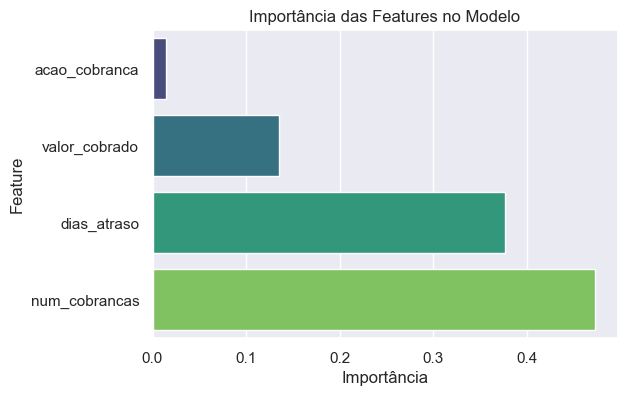

In [89]:
# Importância das Features
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.show()

## 🔍 Importância das Features
Esse gráfico mostra **quais variáveis mais impactam a decisão do modelo**.

- **`num_cobrancas`** é a feature mais importante, indicando que o número de cobranças feitas tem forte influência na decisão.
- **`dias_atraso`** também tem grande impacto, ou seja, **quanto mais tempo o aluno está em atraso, maior a probabilidade de inadimplência**.
- **`valor_cobrado`** tem impacto moderado.
- **`acao_cobranca`** tem impacto baixo, indicando que o tipo de cobrança pode não ser tão relevante quanto a frequência das cobranças.

# 6. Relatório Final

## 🎯 Objetivo do Projeto
O objetivo deste projeto é desenvolver um **modelo preditivo** para estimar a probabilidade de um aluno **pagar sua mensalidade** após receber uma ação de cobrança. Isso ajudará a otimizar estratégias de cobrança, aumentando a eficácia e reduzindo a inadimplência.

---

## 📂 Processamento dos Dados
### 1️⃣ **Leitura e Tratamento dos Dados**
- **Dois conjuntos de dados foram utilizados**:
  - `df_mensalidades`: Contém informações sobre as mensalidades dos alunos (valor, vencimento e pagamento).
  - `df_cobranca`: Contém o histórico das ações de cobrança (tipo de cobrança e data).
- **Conversão das colunas de datas** para o formato `datetime`, garantindo compatibilidade nas operações.

### 2️⃣ **Criação de Features**
- **Status do Pagamento** (`status_pagamento`): Classifica os alunos em:
  - `pago`: Se a mensalidade foi quitada.
  - `inadimplente`: Se já venceu e não foi paga.
  - `atrasado`: Se ainda está dentro do prazo, mas não foi paga.
- **Merge entre os datasets** para associar cada cobrança a um status de pagamento.
- **Criação da variável alvo (`pagou_apos_cobranca`)**:
  - **1** → O aluno pagou após a cobrança.
  - **0** → O aluno não pagou após a cobrança.
- **Novas features adicionadas**:
  - `dias_atraso`: Número de dias desde o vencimento da mensalidade.
  - `num_cobrancas`: Quantidade de cobranças feitas ao aluno.

---

## 🤖 Modelo Utilizado
O modelo escolhido foi o **Random Forest Classifier**.  

### 🛠️ **Por que Random Forest?**
✔️ **Balanceia bem viés e variância** (evita overfitting).  
✔️ **Lida bem com variáveis categóricas e numéricas**.  
✔️ **Explicável e robusto** para dados com ruído.  
✔️ **Bom desempenho mesmo sem ajustes complexos**.  

### ⚙️ **Configuração do Modelo**
- **`n_estimators=100`** → 100 árvores na floresta.
- **`max_depth=15`** → Limita a profundidade das árvores para evitar overfitting.
- **`class_weight='balanced'`** → Corrige desbalanceamento entre pagadores e inadimplentes.
- **`random_state=42`** → Garante reprodutibilidade dos resultados.

---

## 📊 Avaliação do Modelo
### ✅ **Resultados Principais**
| **Métrica**         | **Valor** |
|---------------------|----------|
| **Acurácia**       | 88.40%   |
| **ROC AUC**        | 95.16%   |
| **Precision (0)**  | 79%      |
| **Recall (0)**     | 85%      |
| **Precision (1)**  | 93%      |
| **Recall (1)**     | 90%      |

### 📌 **Análise**
🔹 O modelo tem **alta precisão para prever inadimplentes** (85% recall), ajudando a identificar corretamente quem precisa de mais cobranças.  
🔹 A **ROC AUC de 95.16%** indica que o modelo separa muito bem pagadores e inadimplentes.  
🔹 **Pouca taxa de falsos positivos**, reduzindo abordagens desnecessárias a alunos que já pagariam.

---

## 🎯 Conclusão
- O modelo **Random Forest** foi eficaz na previsão de pagamentos, atingindo **alta acurácia (88.40%)** e **excelente separação de classes (ROC AUC 95.16%)**.
- A criação das novas features **melhorou a capacidade preditiva**, destacando a importância da **quantidade de cobranças e do tempo de atraso**.
- Pode ser usado para **otimizar estratégias de cobrança**, priorizando alunos com maior risco de inadimplência.
